In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/llm-detect-ai-generated-text-dataset/Training_Essay_Data.csv


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text-dataset/Training_Essay_Data.csv')

In [4]:
df.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


In [5]:
vect = TfidfVectorizer(stop_words='english', max_features=1000)
X = vect.fit_transform(df['text'])
y = df['generated']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
model = RandomForestClassifier(n_estimators = 100)

In [8]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
y_pred = model.predict(X_test)

accuracy is 98.490%


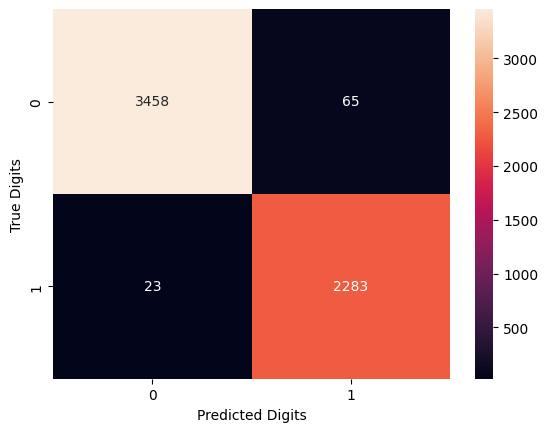

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)
print("accuracy is {0:.3f}%".format(acc*100))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Predicted Digits')
plt.ylabel('True Digits')
plt.show()


In [11]:
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X,y)

RandomForestClassifier()

In [12]:
y_pred2 = model2.predict(X_test)

accuracy is 100.000%


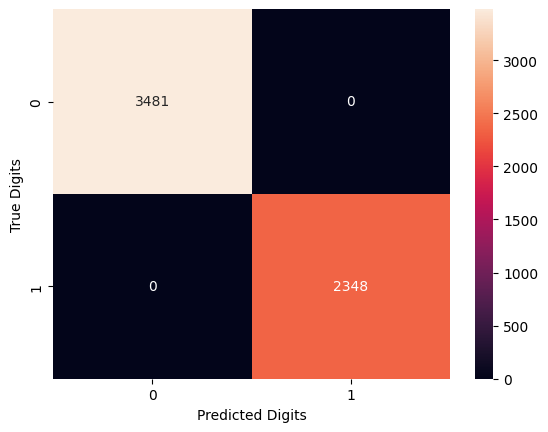

In [13]:

cm2 = confusion_matrix(y_pred2, y_test)
acc2 = accuracy_score(y_pred2, y_test)
print("accuracy is {0:.3f}%".format(acc2*100))
sns.heatmap(cm2, annot=True, fmt='.0f')
plt.xlabel('Predicted Digits')
plt.ylabel('True Digits')
plt.show()

In [14]:
import pickle
with open('AI_generated_text_detection.pkl', 'wb') as fid:
    pickle.dump(model2, fid) 

In [15]:
X[0]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 137 stored elements in Compressed Sparse Row format>

In [16]:
text = """Cars have been around since the 1800's and have been popular ever since. Although, in recent years the number of cars bought and licenses attained have been dropping. Car usage has also dropped, which is a good thing. Because of limited car usage, people are helping the environment and benefiting themselves.

Cars emit pollution which harm our health and the environment's health.

"...Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe... and up to 50 percent in some carintensive areas in the United States." Cars make up a large amount of the emissions that do harm to the environment. When car usage is limited, less people drive, which in turn limits pollution. "... but also in the developing world, where emissions from an increasing number of private cars are owned by the burgeoning middle class are choking cities." Again we see that cars are polluting our world, and it's caused by us. " it will have beneficial implications for carbon emissions and the environment, since transportation is the second largest source of America's emissions, just behind power plants." Cars and other transportation are releasing emissions which are harming the environment. Limited car usage clears up the pollution which helps us and the environment stay healthy.

Many people are taking up new ways of transportation due to bans and such which are due to limits on car usage. They are taking public transportation, walking, carpooling, and so on. All of these methods of alternative transportation are beneficial. "They organize their summer jobs and social life around where they can walk or take public transportation or carpool with friends." It is better to limit car usage because not only are you helping the environment, but you're also saving money and helping yourself out. Due to the lower amount of people who buy cars because of limited car usage, car corporations are also changing. "He proposed partnering with the telecommunications industry to create cities in which pedestrian, bicycle, private cars, commercial and public transportation traffic are woven into a connected network to save time, conserve resources, lower emissions and improve safety.' " The way people live will benefit from lower car usage. Our lifes will be much safer. Although some people may be upset if they can't drive their cars when they want, in the long run it benefits all of the community.

As bans continued to be passed and people are choosing to walk or take the bus instead, limted car usage continues. We can see that it is beneficial to us and will help our environment in the long run. Limited car usage is truely a good thing for us and will hopefully continue."""
flag = int(model2.predict(vect.transform([text])))
if(flag):
   print("AI Generated")
else:
   print("Not a AI Generated")

Not a AI Generated


In [17]:
print(df['text'][29144])

Cars have been around since the 1800's and have been popular ever since. Although, in recent years the number of cars bought and licenses attained have been dropping. Car usage has also dropped, which is a good thing. Because of limited car usage, people are helping the environment and benefiting themselves.

Cars emit pollution which harm our health and the environment's health.

"...Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe... and up to 50 percent in some carintensive areas in the United States." Cars make up a large amount of the emissions that do harm to the environment. When car usage is limited, less people drive, which in turn limits pollution. "... but also in the developing world, where emissions from an increasing number of private cars are owned by the burgeoning middle class are choking cities." Again we see that cars are polluting our world, and it's caused by us. " it will have beneficial implications for carbon emissions and the 

In [18]:
df.tail()

,text,generated
29140,There has been a fuss about the Elector Colleg...,0
29141,Limiting car usage has many advantages. Such a...,0
29142,There's a new trend that has been developing f...,0
29143,As we all know cars are a big part of our soci...,0
29144,Cars have been around since the 1800's and hav...,0
